In [1]:
        #from google.colab import files
        #uploaded = files.upload()

In [2]:
import kagglehub

# Download latest version
dir_path = kagglehub.dataset_download("tamzidhasan/protein-secondary-structure-casp12-cb513-ts115")

print("Path to dataset files:", dir_path)

Path to dataset files: /root/.cache/kagglehub/datasets/tamzidhasan/protein-secondary-structure-casp12-cb513-ts115/versions/1


In [3]:
import os
import numpy as np
import math
from matplotlib import pyplot as plt
import csv


# Read the file
casp12 = 'test_secondary_structure_casp12.csv'
casp12_path = os.path.join(dir_path, casp12)
print(casp12_path)
seqs = []
sst3 = []
with open(casp12_path) as csvfile:
    fp = csv.DictReader(csvfile)
    for row in fp:
        sq = row['seq']
        ss = row['sst3']

        #print(f"Sequence: {sq}")
        #print(f"SST3:     {ss}")

        # append
        seqs.append(sq)
        sst3.append(ss)

seqs = np.array(seqs)
sst3 = np.array(sst3)
print("number of sequences", seqs.shape)
print("len", len(seqs[3]))
print(seqs[3])


/root/.cache/kagglehub/datasets/tamzidhasan/protein-secondary-structure-casp12-cb513-ts115/versions/1/test_secondary_structure_casp12.csv
number of sequences (21,)
len 358
MAHHHHHHMAISPRDEQNRSVDLWFAYKVPKLTKDADSDSASGYEYVYYDRQVGAVQKSPNLMNDPKGALFYTLDSVFGDPGDTTGWILYNDEMPADANRSNNATLGHTKGVIAFDIASSSALWLLHSWPKYASPSVPGVPTPLYGQTFLCLSLDLATAGKLAAQMALHQQPQVYLPRTGGLDHTSPLYALTQPLNASAPGDSDSLDFKTRGGVPFKVIAKNRKWGKDFWNDLVGPTLKADMYVETWIRGKIPPVLDSDGVHKTYDIKFIDLRKLGAPWAWPETQDHAKWGITTTDNWVCVGDINRMVTQEKRGGGTIAFQDPKLWKALCETDLIIPPPGKTDAQARAMIRKTHEPAE


In [4]:
# Amino acid and secondary structure mapping
aas = 'ACDEFGHIKLMNPQRSTVWY'
aas_idx = {aa: i for i, aa in enumerate(aas)}
ss_map = {'H':0, 'E':1, 'C':2}
inv_ss_map = {0: 'H', 1: 'E', 2: 'C'}
print(aas_idx)

def onehot(aa):
    aa_hot = np.zeros(20)
    if aa in aas_idx:
        aa_hot[aas_idx[aa]] = 1.
    return aa_hot

print(seqs[0][0])
print(onehot(seqs[0][0]))
print(seqs[0][1])
print(onehot(seqs[0][1]))



{'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}
M
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
H
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# the onehot encoded window inputs
def window_encode(seq, pos, w):
    half = w // 2
    pad = '-' * half
    padded = pad + seq + pad
    window = []
    for aa in padded[pos:pos+w]:
        window.extend(onehot(aa) if aa in aas_idx else np.zeros(20))
        #window.append(onehot(aa) if aa in aas_idx else np.zeros(20))
    return np.array(window)

w = 13
first_w = window_encode(seqs[0], 0, w)
print("first",first_w)
other_w = window_encode(seqs[0], 35, w)
print("other",other_w)

first [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
other [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [6]:
# concatenate all windows moving one nucleotide at the time
#
#
def encode_dataset(seqs, sst3, w):
    half = w//2
    X, Y = [], []
    for sq, ss in zip(seqs, sst3):
        for i in range(len(sq)-half):
            X.append(window_encode(sq, i, w))
            Y.append(ss_map[ss[i]])
    return np.stack(X), np.array(Y)

X, Y = encode_dataset(seqs,sst3, w)
print(X.shape)
print(Y.shape)


(7130, 260)
(7130,)


In [7]:
class MLP:
    def __init__(self, I, H, O):
        # the parameters
        self.W1 = np.random.randn(I, H) / np.sqrt(I)
        self.b1 = np.zeros(H)
        self.W2 = np.random.randn(H, O) / np.sqrt(H)
        self.b2 = np.zeros(O)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_deriv(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / exps.sum(axis=1, keepdims=True)

    def forward(self, X):
        # X [M,I]
        # W1[I,H]
        # X @ W1 is [M,H]
        a1 = X @ self.W1 + self.b1
        h1 = self.relu(a1)

        # h1[M,H]
        # W2[H,O]
        # h1 @ W2 is [M,O]
        a2 = h1 @ self.W2 + self.b2
        return a1, h1, a2

    def predict(self, X):
        _, _, a2 = self.forward(X)
        y = self.softmax(a2)
        return np.argmax(y, axis=1)

    def train(self, X, Y, epochs=20, lr=0.2):
        for epoch in range(epochs):
            # Forward
            a1, h1, a2 = self.forward(X)
            probs = self.softmax(a2)

            Y_onehot = np.eye(3)[Y]

            # cross entropy loss
            loss = -np.mean(np.sum(Y_onehot * np.log(probs + 1e-7), axis=1))

            # Backward
            # da2 = dL/da2
            # dW2 = dL/dW2 = da2 * da2/dW2 = da2 * h1
            da2 = (probs - Y_onehot) / X.shape[0]
            dW2 = h1.T @ da2
            db2 = da2.sum(axis=0)

            # dW1 = dL/dW1 = dL/da1 * da1/dW1 = da1 * X
            #
            # da1 = dL/da1
            # da1 = dL/dh1 * dh1/da1 = dh1 * dh1/da1
            # dh1 = dL/dh1 = dL/da2 * da2/dh1 = da2 * W2
            dh1 = da2 @ self.W2.T
            da1 = dh1 * self.relu_deriv(a1)

            dW1 = X.T @ da1
            db1 = da1.sum(axis=0)

            # Update
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            self.W1 -= lr * dW1
            self.b1 -= lr * db1

            # Accuracy
            acc = (self.predict(X) == Y).mean()
            if (epoch + 1) % 50 == 0 or epoch == 0:
              print(f"Epoch {epoch+1}: Loss={loss:.4f}, Acc={acc:.3f}")

# at work
epochs = 1000

#  Qian & Sejnowski parameters
w = 13
I = w*20
H = 40
O = 3
X, Y = encode_dataset(seqs, sst3, w)
model = MLP(I, H, O)
model.train(X, Y, epochs, lr=0.3)

# Predict on same dataset
Y_pred = model.predict(X)
print("True      Structure:", "".join(inv_ss_map[y] for y in Y))
print("Predicted Structure:", "".join(inv_ss_map[y] for y in Y_pred))

Epoch 1: Loss=1.1411, Acc=0.323
Epoch 50: Loss=0.9930, Acc=0.502
Epoch 100: Loss=0.8867, Acc=0.607
Epoch 150: Loss=0.8165, Acc=0.641
Epoch 200: Loss=0.7899, Acc=0.656
Epoch 250: Loss=0.7760, Acc=0.659
Epoch 300: Loss=0.7652, Acc=0.663
Epoch 350: Loss=0.7553, Acc=0.668
Epoch 400: Loss=0.7453, Acc=0.672
Epoch 450: Loss=0.7347, Acc=0.678
Epoch 500: Loss=0.7233, Acc=0.685
Epoch 550: Loss=0.7111, Acc=0.695
Epoch 600: Loss=0.6979, Acc=0.703
Epoch 650: Loss=0.6838, Acc=0.712
Epoch 700: Loss=0.6686, Acc=0.721
Epoch 750: Loss=0.6522, Acc=0.729
Epoch 800: Loss=0.6350, Acc=0.742
Epoch 850: Loss=0.6168, Acc=0.751
Epoch 900: Loss=0.5980, Acc=0.762
Epoch 950: Loss=0.5785, Acc=0.775
Epoch 1000: Loss=0.5588, Acc=0.787
True      Structure: CCCCCCCCCCCCCCCCCCEEEEEECCCCCCCCCCCEEEECCEEEEEEEEEEECCCCCCEEEEEEECHHHHHHCCCCCEEEECCCCECCCCECCCCHHHHCCCEEEECCCCCCCCCCCCEEECCCCCCCCCCCEEEEEECCCCCCCCCCCEEEECCEEEEEEEEEEECCCCCCEEEEEEECCCCHHHCECCCEEEEECCCEEECCCCCCEEECCHHHHHHCCEEEEECCCCCCCCCECCCCCEEECECCHHHHHHHCCCCCEEEEEEE

In [18]:
# same MLP using pytorch
#
import torch
import torch.nn as nn
import torch.optim as optim

class ProteinMLP(nn.Module):
    # MPL definition
    def __init__(self, I, H, O):
        super().__init__()
        self.fc1 = nn.Linear(I, H)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(H, O)

    # Definition of the forward pass
    # inputs are X outputs are Y in logits (not normalized)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

#  Qian & Sejnowski parameters
w = 13
I = w*20
H = 40
O = 3

# Training set converted to PyTorch tensors
# X are the inputs [N,I]
# Y are the labels [N]
X, Y = encode_dataset(seqs, sst3, w)
X_torch = torch.tensor(X, dtype=torch.float32)
Y_torch = torch.tensor(Y, dtype=torch.long)

# Create the model
model = ProteinMLP(I, H, O)
# Create the Loss
criterion = nn.CrossEntropyLoss()
# The optimization: Adam
optimizer = optim.Adam(model.parameters(), lr=0.1)

# The training loop
n_epochs = 200
acc_epoch = []
loss_epoch = []
for epoch in range(n_epochs):
    optimizer.zero_grad()             # clear the gradients of all parameters
    logits = model(X_torch)           # Forward pass: get logits (scores for each class).
    loss = criterion(logits, Y_torch) # calculate cross-entropy loss
    loss.backward()                   # backward pass: calculate gradients dW = dL/dW
    optimizer.step()                  # update the parameters: W <- W - lr * dW
    pred = logits.argmax(dim=1)       # predict the class with higher probability
    acc = (pred == Y_torch).float().mean().item() # calculate accuracy

    acc_epoch.append(acc)
    loss_epoch.append(loss.item())
    if (epoch + 1) % 2 == 0 or epoch == 0:       # print accuracy every 50 epochs
        print(f"Epoch {epoch+1}/{n_epochs} Loss: {loss.item():.4f} Acc: {acc:.3f}")


Epoch 1/200 Loss: 1.0820 Acc: 0.453
Epoch 2/200 Loss: 2.5895 Acc: 0.481
Epoch 4/200 Loss: 1.0545 Acc: 0.469
Epoch 6/200 Loss: 1.0309 Acc: 0.548
Epoch 8/200 Loss: 1.0039 Acc: 0.588
Epoch 10/200 Loss: 0.9779 Acc: 0.598
Epoch 12/200 Loss: 0.9561 Acc: 0.598
Epoch 14/200 Loss: 0.9407 Acc: 0.600
Epoch 16/200 Loss: 0.9303 Acc: 0.596
Epoch 18/200 Loss: 0.9232 Acc: 0.599
Epoch 20/200 Loss: 0.9166 Acc: 0.603
Epoch 22/200 Loss: 0.9098 Acc: 0.610
Epoch 24/200 Loss: 0.9022 Acc: 0.618
Epoch 26/200 Loss: 0.8942 Acc: 0.625
Epoch 28/200 Loss: 0.8869 Acc: 0.630
Epoch 30/200 Loss: 0.8807 Acc: 0.632
Epoch 32/200 Loss: 0.8768 Acc: 0.632
Epoch 34/200 Loss: 0.8723 Acc: 0.633
Epoch 36/200 Loss: 0.8674 Acc: 0.634
Epoch 38/200 Loss: 0.8623 Acc: 0.635
Epoch 40/200 Loss: 0.8579 Acc: 0.637
Epoch 42/200 Loss: 0.8542 Acc: 0.635
Epoch 44/200 Loss: 0.8511 Acc: 0.635
Epoch 46/200 Loss: 0.8483 Acc: 0.635
Epoch 48/200 Loss: 0.8460 Acc: 0.634
Epoch 50/200 Loss: 0.8443 Acc: 0.633
Epoch 52/200 Loss: 0.8429 Acc: 0.632
Epoch 

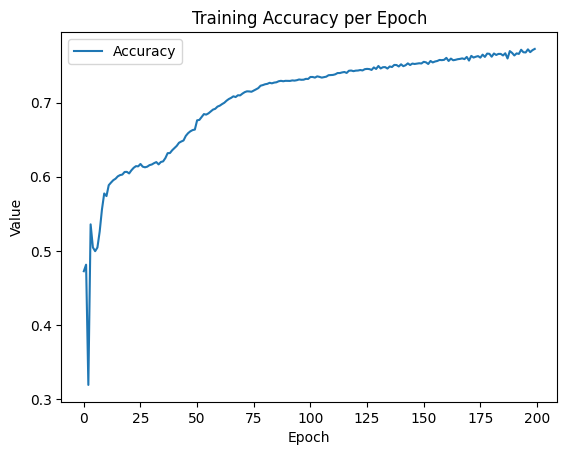

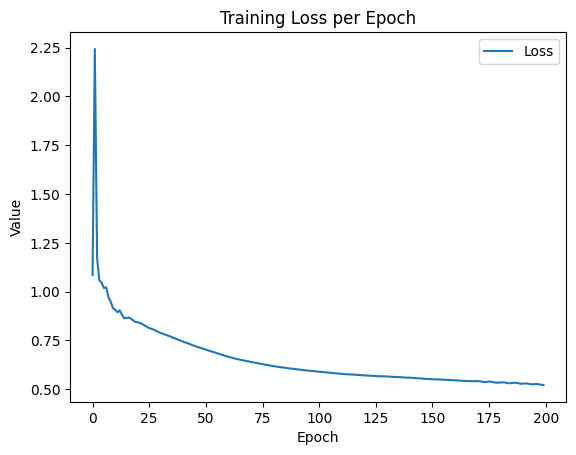

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(acc_epoch, label='Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Training Accuracy per Epoch")
plt.show()

plt.figure()
plt.plot(loss_epoch, label='Loss')
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Training Loss per Epoch")
plt.show()



